In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  

print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.0 


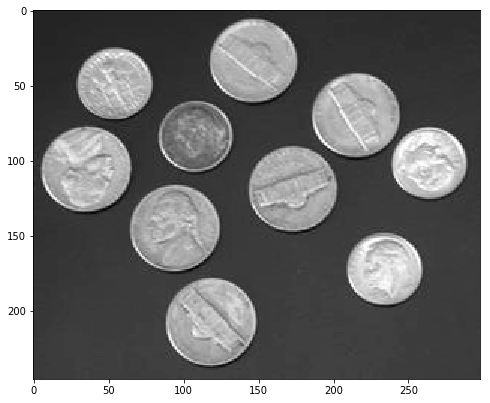

In [2]:
coins = cv2.imread('coins.jpg',0)

plt.figure(figsize=(8,8))
plt.imshow(coins, cmap='gray')
plt.show()

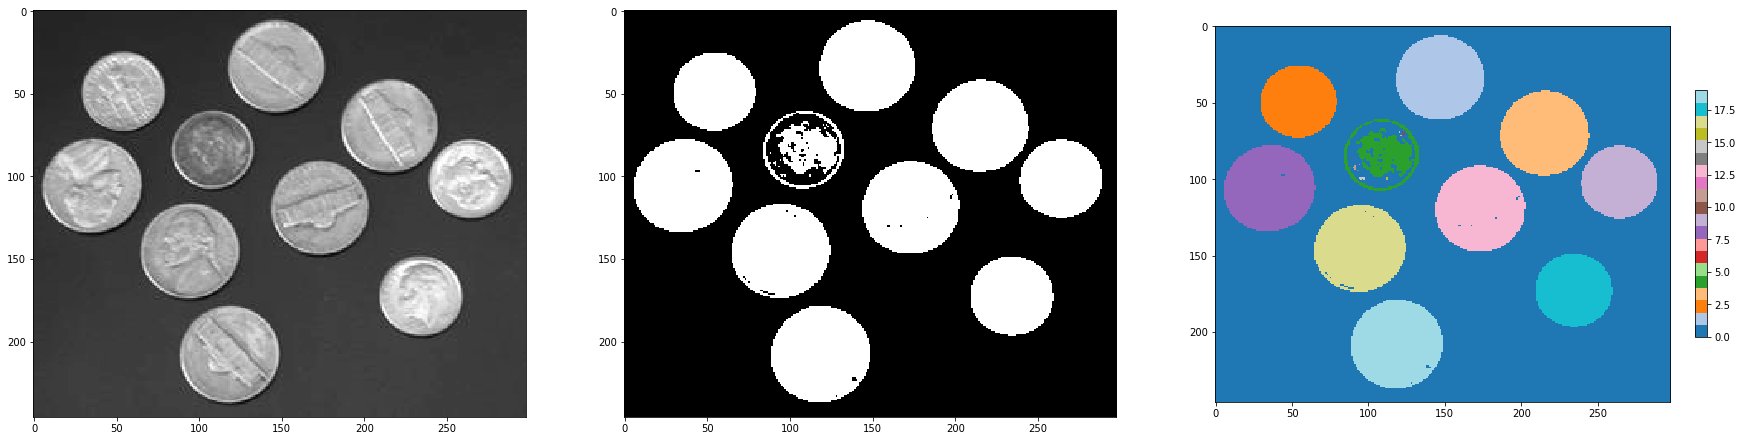

In [3]:
otsu_val,coins_otsu = cv2.threshold(coins,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

retval, labels = cv2.connectedComponents(coins_otsu)

plt.figure(figsize=(30,15))
plt.subplot(1,3,1), plt.imshow(coins,cmap='gray')
plt.subplot(1,3,2),plt.imshow(coins_otsu,cmap ='gray')
plt.subplot(1,3,3), plt.imshow(labels,plt.cm.tab20)
plt.colorbar(fraction=0.025)
plt.show()


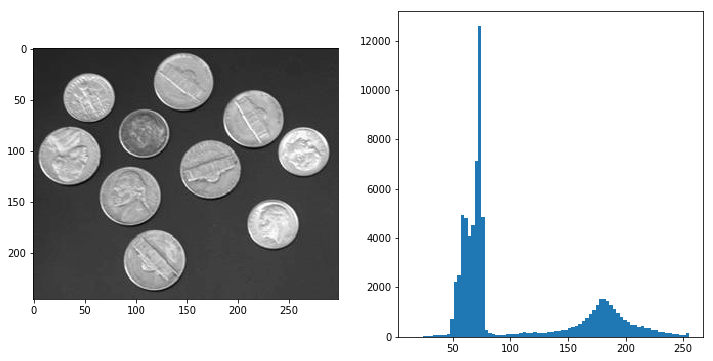

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1),plt.imshow(coins,cmap = 'gray')
plt.subplot(1,2,2),plt.hist(coins.flatten(), bins=80)
plt.show()

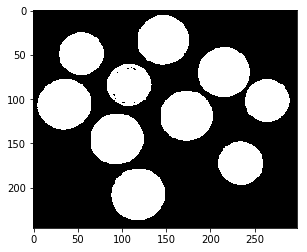

In [5]:
coins = cv2.imread('coins.jpg',0)
coins[coins<95] = 0
coins[coins != 0] = 255
plt.imshow(coins,cmap="gray",interpolation="nearest")
plt.show()

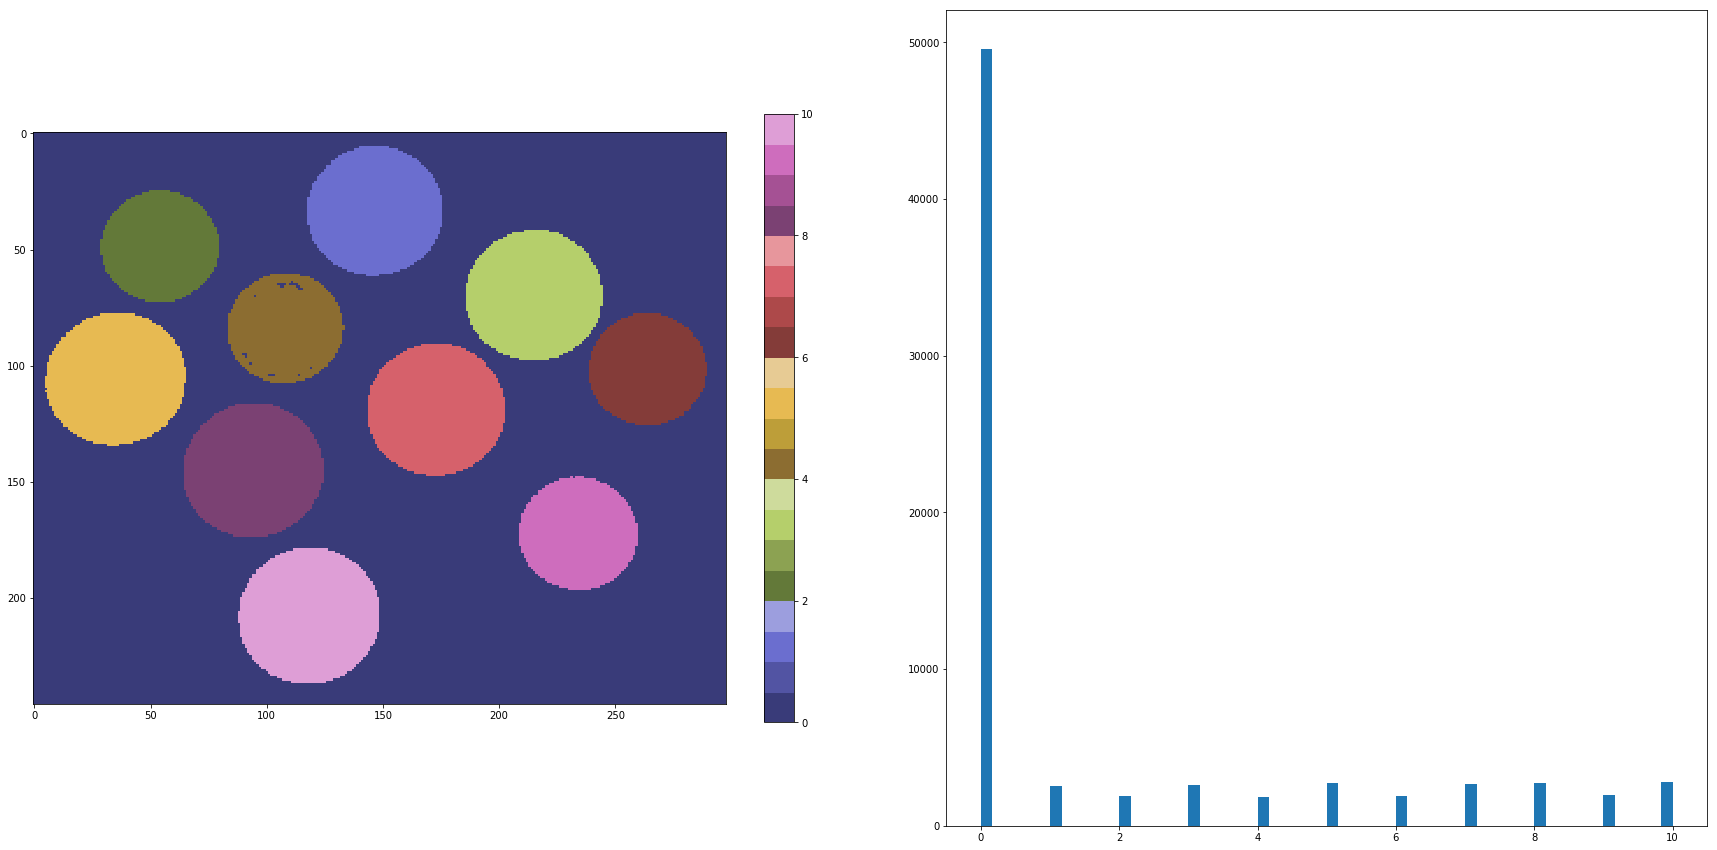

In [6]:
a,labels = cv2.connectedComponents(coins)
plt.figure(figsize=(30,15))
plt.subplot(1,2,1),plt.imshow(labels,cmap='tab20b')
plt.colorbar(fraction=0.040)


plt.subplot(1,2,2),plt.hist(labels.flatten(), bins=60)
plt.show()

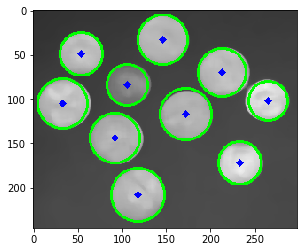

In [7]:
img = cv2.imread('coins.jpg',0)
img = cv2.medianBlur( img, 11 )
cimg = cv2.cvtColor( img, cv2.COLOR_GRAY2BGR )
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                         param1=50,param2=30,minRadius=0,maxRadius=0)


for i in circles[0,:]:
    cv2.circle( cimg, (i[0], i[1]), i[2], (0, 255, 0), 2 )
    cv2.circle( cimg, (i[0], i[1]), 2, (0, 0, 255), 3 )
    
plt.imshow(cimg,cmap = 'gray')
plt.show()

# Canny Edges

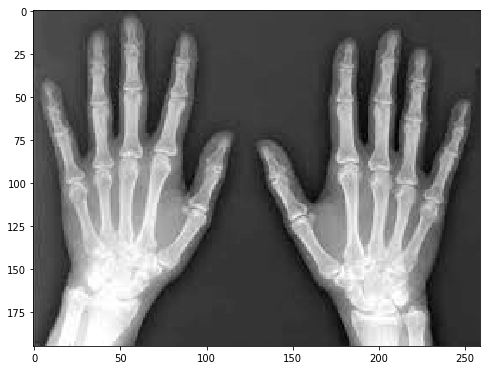

In [8]:
xray = cv2.imread('xray.jpeg',0)

plt.figure(figsize=(8,8))
plt.imshow(xray, cmap='gray')
plt.show()

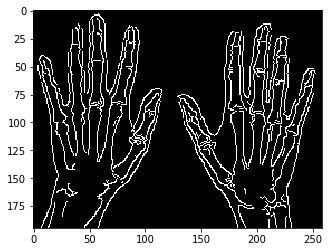

In [9]:
xray = cv2.imread('xray.jpeg',0)

edges = cv2.Canny(xray,100,200)
plt.imshow(edges,cmap = 'gray')
plt.show()

# Feature matching

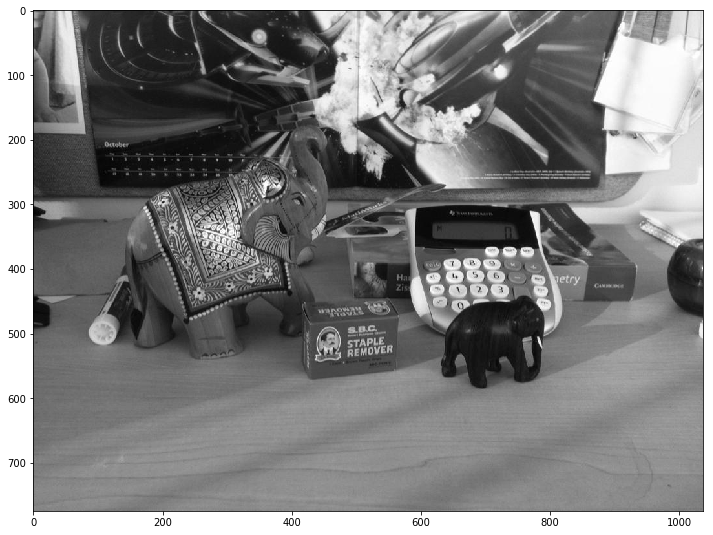

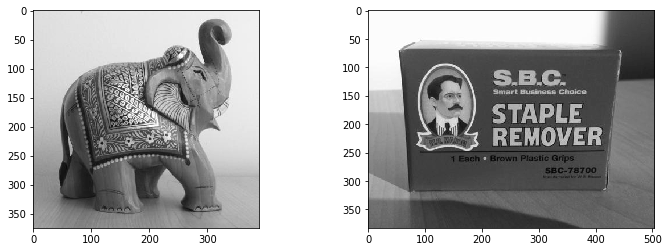

In [10]:
img = cv2.imread('clutteredDesk.jpg',0)
q1 = cv2.imread('elephant.jpg',0)
q2 = cv2.imread('stapleRemover.jpg',0)


plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')
plt.show()


plt.figure(figsize=(12,4))
plt.subplot(1,2,1),plt.imshow(q1, cmap='gray')
plt.subplot(1,2,2),plt.imshow(q2, cmap='gray')
plt.show()

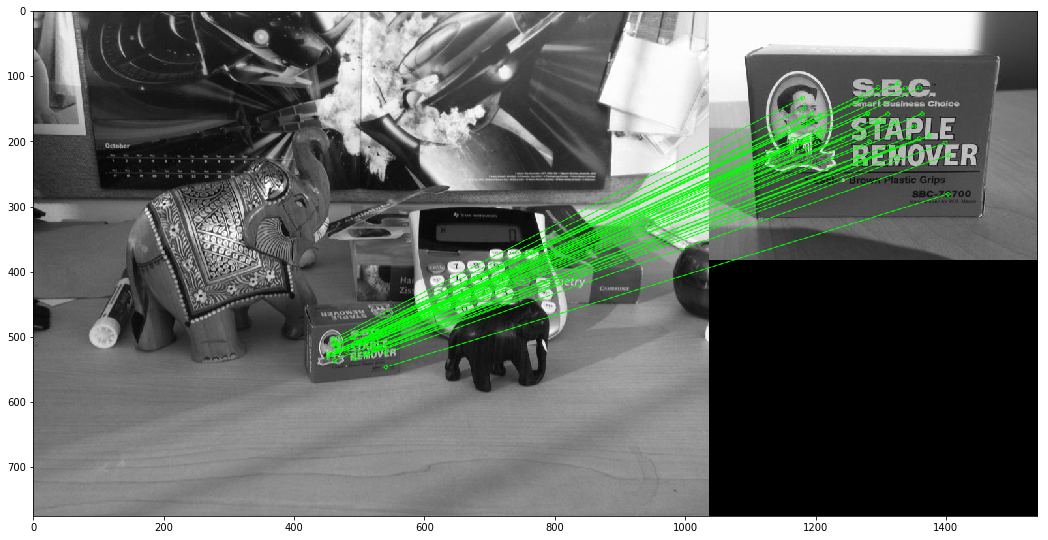

In [11]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(q2,None)



bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.45*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img,kp1,q2,kp2,good,outImg= 10,flags =2,matchColor=(0, 255, 0),singlePointColor = (0,0,255)
                          )

plt.figure(figsize=(18,12))

plt.imshow(img3)
plt.show()